In [ ]:
!pip install scikeras

# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import warnings
import keras
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from collections import defaultdict
import tensorflow

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from collections import Counter
from collections import defaultdict
#UnderSampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
#Oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder




# Model
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize, OneHotEncoder


# Neural Networks
import tensorflow as tf
from tensorflow import keras
from sklearn.neural_network import MLPClassifier, MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.regularizers import L1, L2
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.layers import Dropout
from keras.regularizers import l2, l1


# from keras_tuner import RandomSearch, HyperParameters
from sklearn.exceptions import ConvergenceWarning

# Evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, r2_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss
from sklearn.metrics.pairwise import paired_distances
from sklearn.metrics import make_scorer

In [ ]:

X_train = pd.read_csv("./X_trainc.csv",skipinitialspace=True)
X_test = pd.read_csv("./X_testc.csv",skipinitialspace=True)

In [ ]:
y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)

y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)


class_mapping = {'WALKING':1,'WALKING_UPSTAIRS':2,'WALKING_DOWNSTAIRS':3,
                       'SITTING':4, 'STANDING':5,'LAYING':6}

<ipython-input-3-b5769ef30983>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
<ipython-input-3-b5769ef30983>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)


In [ ]:
X_train = X_train.drop(['Activity', 'ActivityName','subject'], axis = 1).values
y_train = np.array(y_train)

X_test = X_test.drop(['Activity', 'ActivityName', 'subject'], axis = 1).values
y_test = np.array(y_test)

array([[ 0.28858451, -0.02029417, -0.13290514, ...,  0.03040037,
        -0.46476139, -0.01844588],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.00743457,
        -0.73262621,  0.70351059],
       [ 0.27965306, -0.01946716, -0.11346169, ...,  0.17789948,
         0.10069921,  0.80852908],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.26672437,
         0.86440401,  0.70116882],
       [ 0.28965416, -0.01884304, -0.15828059, ...,  0.70073969,
         0.93667394, -0.58947895],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.00773928,
        -0.05608759, -0.61695645]])

In [ ]:
# just try with dropout
from scikeras.wrappers import KerasClassifier

keras.backend.clear_session()
tf.random.set_seed(42)
def build_model(hidden_layer_sizes, activation, learning_rate, momentum, optimizer, dropout_rate):
    n_features_in_ = X_train.shape[1]
    n_classes_ = 6
    model = keras.models.Sequential()

    model.add(keras.layers.Input(shape=(n_features_in_)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
        model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(n_classes_, activation="softmax"))

    if optimizer == 'Adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [ ]:

from sklearn.utils import parallel_backend
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
%%time
clf = KerasClassifier(
    model=build_model,
    loss="sparse_categorical_crossentropy",
    verbose=False, momentum = 0.5, learning_rate = 0.1, optimizer = 'sgd')

params = {
    'optimizer__learning_rate': [0.001,0.01,0.1],
    'model__hidden_layer_sizes': [(100,100),(128,64),(256,128),(512,256)],
    'model__activation': ['relu', 'tanh'],
    'epochs': [200,300,400],
    'batch_size' :[32,64,128],
    'momentum':[0.1,0.3,0.5,0.9],
    'model__optimizer': ['SGD','Adam'],
    'model__dropout_rate': [0.05, 0.2, 0.5]}


CPU times: user 47 µs, sys: 0 ns, total: 47 µs
Wall time: 52 µs


In [ ]:
gs = RandomizedSearchCV(clf, params, scoring='accuracy', n_jobs=4, verbose=1, cv=5, n_iter = 15,
                       )
gs.fit(X_train, y_train)

print(gs.best_score_, gs.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


PicklingError: ignored

In [ ]:
import keras
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

keras.backend.clear_session()
tf.random.set_seed(42)

def build_model(hidden_layer_sizes, activation, learning_rate, momentum, optimizer, dropout_rate):
    n_features_in_ = X_train.shape[1]
    n_classes_ = 6
    model = keras.models.Sequential()

    model.add(keras.layers.Input(shape=(n_features_in_)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
        model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(n_classes_, activation="softmax"))

    if optimizer == 'Adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

clf = KerasClassifier(
    model=build_model,
    loss="sparse_categorical_crossentropy",
    verbose=False, momentum = 0.5, learning_rate = 0.1, optimizer = 'sgd')

params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1],
    'model__hidden_layer_sizes': [(100, 100), (128, 64), (256, 128), (512, 256)],
    'model__activation': ['relu', 'tanh'],
    'epochs': [200, 300, 400],
    'batch_size': [32, 64, 128],
    'momentum': [0.1, 0.3, 0.5, 0.9],
    'model__optimizer': ['SGD', 'Adam'],
    'model__dropout_rate': [0.05, 0.2, 0.5]
}

gs = RandomizedSearchCV(clf, params, scoring='accuracy', n_jobs=4, verbose=1, cv=5, n_iter=15)
gs.fit(X_train, y_train)

print(gs.best_score_, gs.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.9362139689322364 {'optimizer__learning_rate': 0.01, 'momentum': 0.1, 'model__optimizer': 'SGD', 'model__hidden_layer_sizes': (256, 128), 'model__dropout_rate': 0.5, 'model__activation': 'relu', 'epochs': 300, 'batch_size': 128}


## 2 HIDDEN layers with l2: 0.01 and dropout 0.5

'optimizer__learning_rate': 0.01, 'momentum': 0.1, 'model__optimizer': 'SGD', 'model__hidden_layer_sizes': (256, 128), 'model__dropout_rate': 0.5,
 'model__activation': 'relu', 'epochs': 300, 'batch_size': 128



In [ ]:
from keras import regularizers

n_classes = 6

keras.backend.clear_session()
tf.random.set_seed(42)

def build_model1():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(256,input_dim=n_feature, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    #model.add(Dropout(0.7))
    model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))

    model.add(Dropout(0.50))

    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(momentum = 0.1, learning_rate=0.01), metrics=['accuracy'])

    return model


es = EarlyStopping(monitor='val_accuracy', patience=40, verbose=True)

clf = KerasClassifier(build_fn=build_model1)




In [ ]:
from sklearn.utils import shuffle

# Shuffle the training data and labels
#X_train, y_train = shuffle(X_train, y_train, random_state=0)

clf.fit(X_train, y_train, epochs=300, batch_size = 128, validation_split = 0.2)

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 14ms/step - loss: 5.2627 - accuracy: 0.2872 - val_loss: 5.0745 - val_accuracy: 0.5146
Epoch 2/300
46/46 [==============================] - 0s 9ms/step - loss: 4.9712 - accuracy: 0.4814 - val_loss: 4.8054 - val_accuracy: 0.6676
Epoch 3/300
46/46 [==============================] - 0s 8ms/step - loss: 4.7234 - accuracy: 0.5815 - val_loss: 4.5568 - val_accuracy: 0.7077
Epoch 4/300
46/46 [==============================] - 0s 9ms/step - loss: 4.5054 - accuracy: 0.6342 - val_loss: 4.3409 - val_accuracy: 0.7553
Epoch 5/300
46/46 [==============================] - 0s 6ms/step - loss: 4.3166 - accuracy: 0.6711 - val_loss: 4.1633 - val_accuracy: 0.7770
Epoch 6/300
46/46 [==============================] - 0s 6ms/step - loss: 4.1682 - accuracy: 0.6807 - val_loss: 4.0175 - val_accuracy: 0.8063
Epoch 7/300
46/46 [==============================] - 0s 5ms/step - loss: 4.0373 - accuracy: 0.7029 - val_loss: 3.8915 - val_accuracy: 0.8205
Epoch 8/300
46/46 [=====

KerasClassifier(
	model=None
	build_fn=<function build_model1 at 0x7917840f51b0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

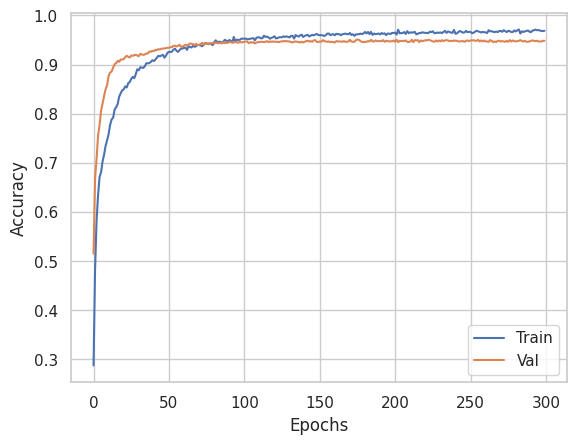

In [ ]:
history = clf.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

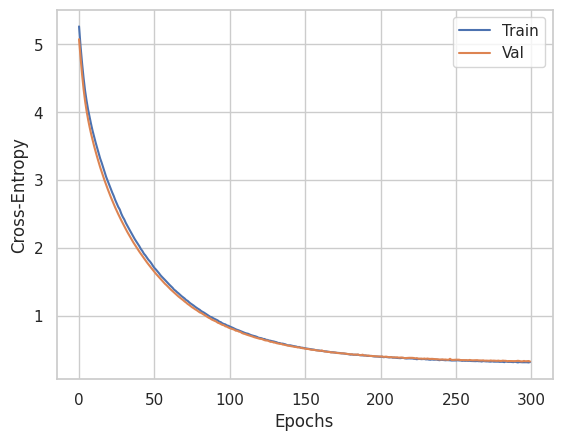

In [ ]:
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [ ]:
y_pred = clf.predict(X_test).astype(int)
y_scores = clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred, target_names = class_mapping, digits = 3))

93/93 [==============================] - 0s 2ms/step
Accuracy 0.9324737020699015
F1-score 0.9312767329039425
                    precision    recall  f1-score   support

           WALKING      0.909     0.990     0.948       496
  WALKING_UPSTAIRS      0.949     0.870     0.908       471
WALKING_DOWNSTAIRS      0.942     0.929     0.935       420
           SITTING      0.914     0.866     0.889       491
          STANDING      0.887     0.930     0.908       532
            LAYING      0.998     1.000     0.999       537

          accuracy                          0.932      2947
         macro avg      0.933     0.931     0.931      2947
      weighted avg      0.933     0.932     0.932      2947



93/93 [==============================] - 0s 1ms/step


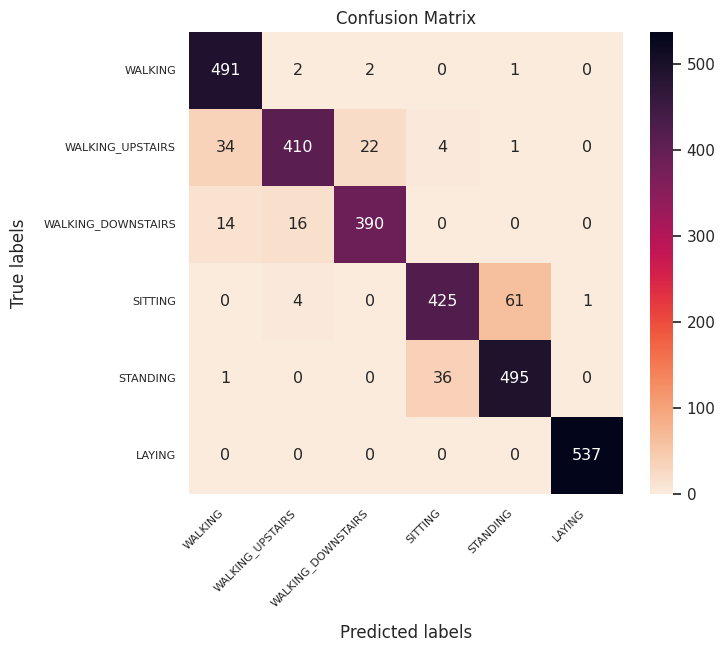

                    precision    recall  f1-score   support

           WALKING      0.909     0.990     0.948       496
  WALKING_UPSTAIRS      0.949     0.870     0.908       471
WALKING_DOWNSTAIRS      0.942     0.929     0.935       420
           SITTING      0.914     0.866     0.889       491
          STANDING      0.887     0.930     0.908       532
            LAYING      0.998     1.000     0.999       537

          accuracy                          0.932      2947
         macro avg      0.933     0.931     0.931      2947
      weighted avg      0.933     0.932     0.932      2947



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict using the best model
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test.ravel(), y_pred)

# Define the inverse class mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}

# Define the class labels from unique values in y_test and y_pred
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Define the class names using inv_class_mapping and class_labels
class_names = [inv_class_mapping[label] for label in class_labels]

# Set a more contrasting color scheme
cmap = sns.color_palette('rocket_r', as_cmap=True)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, xticklabels=class_names, yticklabels=class_names, cmap=cmap, annot_kws={"fontsize": 11.5})

# Set x-axis label distance
ax.xaxis.labelpad = 11

# Set y-axis label distance
ax.yaxis.labelpad = 11

# Set tick label font size and distance for class names
ax.set_xticklabels(class_names, fontsize=8, rotation=45, ha='right')
ax.set_yticklabels(class_names, fontsize=8)

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

# Print the classification report
classification_rep = classification_report(y_test.ravel(), y_pred, target_names=class_names, digits = 3)
print(classification_rep)





In [ ]:
import keras
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

keras.backend.clear_session()
tf.random.set_seed(42)

def build_model(hidden_layer_sizes, activation, learning_rate, momentum, optimizer, dropout_rate):
    n_features_in_ = X_train.shape[1]
    n_classes_ = 6
    model = keras.models.Sequential()

    model.add(keras.layers.Input(shape=(n_features_in_)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
        model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(n_classes_, activation="softmax"))

    if optimizer == 'Adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

clf = KerasClassifier(
    model=build_model,
    loss="sparse_categorical_crossentropy",
    verbose=False, momentum = 0.5, learning_rate = 0.1, optimizer = 'sgd')

params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1],
    'model__hidden_layer_sizes': [(100, 100,100), (128, 64,32), (256, 128, 64), (512, 256,128)],
    'model__activation': ['relu', 'tanh'],
    'epochs': [200, 300, 400],
    'batch_size': [32, 64, 128],
    'momentum': [0.1, 0.3, 0.5, 0.9],
    'model__optimizer': ['SGD', 'Adam'],
    'model__dropout_rate': [0.05, 0.2, 0.5]
}

gs = RandomizedSearchCV(clf, params, scoring='accuracy', n_jobs=6, verbose=1, cv=5, n_iter=15)
gs.fit(X_train, y_train)

print(gs.best_score_, gs.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
0.9340355258350792 {'optimizer__learning_rate': 0.1, 'momentum': 0.1, 'model__optimizer': 'SGD', 'model__hidden_layer_sizes': (100, 100, 100), 'model__dropout_rate': 0.5, 'model__activation': 'tanh', 'epochs': 300, 'batch_size': 64}


0.9340355258350792 {'optimizer__learning_rate': 0.1, 'momentum': 0.1, 'model__optimizer': 'SGD', 'model__hidden_layer_sizes': (100, 100, 100), 'model__dropout_rate': 0.5, 'model__activation': 'tanh', 'epochs': 300, 'batch_size': 64}


In [ ]:
from keras import regularizers

n_classes = 6

keras.backend.clear_session()
tf.random.set_seed(42)

def build_model1():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(100,input_dim=n_feature, activation='tanh',kernel_regularizer=regularizers.l2(0.005)))
    model.add(Dropout(0.70))

    model.add(Dense(100, activation='tanh',kernel_regularizer=regularizers.l2(0.005)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='tanh',kernel_regularizer=regularizers.l2(0.005)))


    model.add(Dropout(0.30))

    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(momentum = 0.1, learning_rate=0.1), metrics=['accuracy'])

    return model


es = EarlyStopping(monitor='val_accuracy', patience=40, verbose=True)

clf = KerasClassifier(build_fn=build_model1, callbacks =[es])




In [ ]:
from sklearn.utils import shuffle

# Shuffle the training data and labels
#X_train, y_train = shuffle(X_train, y_train, random_state=0)

clf.fit(X_train, y_train, epochs=300, batch_size = 64, validation_split = 0.2)

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


92/92 [==============================] - 2s 11ms/step - loss: 2.5686 - accuracy: 0.5322 - val_loss: 1.7271 - val_accuracy: 0.8824
Epoch 2/300
92/92 [==============================] - 1s 8ms/step - loss: 1.7784 - accuracy: 0.7701 - val_loss: 1.3477 - val_accuracy: 0.9150
Epoch 3/300
92/92 [==============================] - 1s 13ms/step - loss: 1.4518 - accuracy: 0.8143 - val_loss: 1.1320 - val_accuracy: 0.9273
Epoch 4/300
92/92 [==============================] - 1s 11ms/step - loss: 1.2106 - accuracy: 0.8582 - val_loss: 0.9456 - val_accuracy: 0.9354
Epoch 5/300
92/92 [==============================] - 1s 11ms/step - loss: 1.0314 - accuracy: 0.8777 - val_loss: 0.8342 - val_accuracy: 0.9361
Epoch 6/300
92/92 [==============================] - 0s 4ms/step - loss: 0.8987 - accuracy: 0.8932 - val_loss: 0.8712 - val_accuracy: 0.8749
Epoch 7/300
92/92 [==============================] - 0s 4ms/step - loss: 0.7989 - accuracy: 0.8981 - val_loss: 0.6364 - val_accuracy: 0.9422
Epoch 8/300
92/92 [==

KerasClassifier(
	model=None
	build_fn=<function build_model1 at 0x7b012c454670>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x7b016bf14a90>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

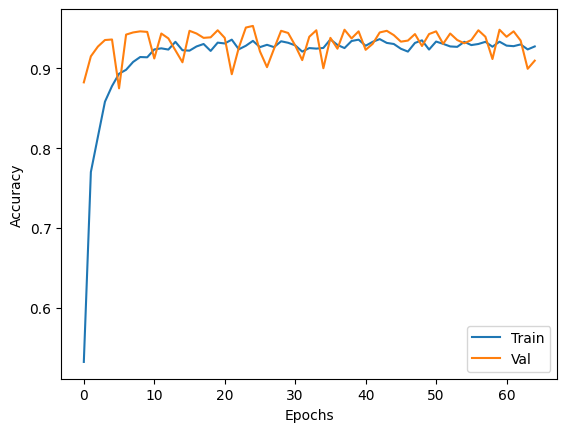

In [ ]:
history = clf.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

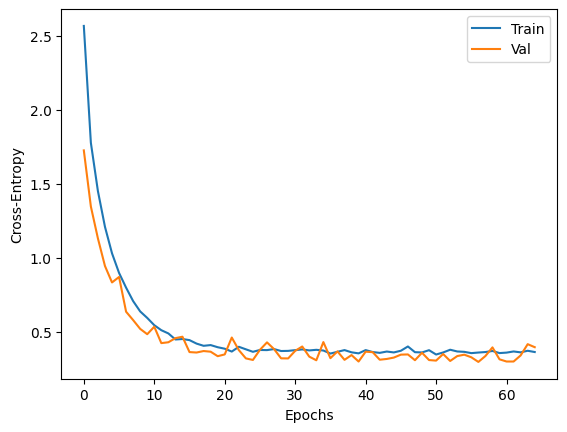

In [ ]:
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [ ]:
y_pred = clf.predict(X_test).astype(int)
y_scores = clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred, target_names = class_mapping))

93/93 [==============================] - 0s 2ms/step
Accuracy 0.8520529351883271
F1-score 0.8488466238922084
                    precision    recall  f1-score   support

           WALKING       0.72      1.00      0.84       496
  WALKING_UPSTAIRS       0.96      0.75      0.84       471
WALKING_DOWNSTAIRS       0.96      0.75      0.84       420
           SITTING       0.94      0.64      0.76       491
          STANDING       0.72      0.97      0.83       532
            LAYING       1.00      0.97      0.98       537

          accuracy                           0.85      2947
         macro avg       0.88      0.85      0.85      2947
      weighted avg       0.88      0.85      0.85      2947



In [ ]:
import keras
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

keras.backend.clear_session()
tf.random.set_seed(42)

def build_model(hidden_layer_sizes, activation, learning_rate, momentum, optimizer, dropout_rate):
    n_features_in_ = X_train.shape[1]
    n_classes_ = 6
    model = keras.models.Sequential()

    model.add(keras.layers.Input(shape=(n_features_in_)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
        model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(n_classes_, activation="softmax"))

    if optimizer == 'Adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

clf = KerasClassifier(
    model=build_model,
    loss="sparse_categorical_crossentropy",
    verbose=False, momentum = 0.5, learning_rate = 0.1, optimizer = 'sgd')

params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1],
    'model__hidden_layer_sizes': [(100,), (128,), (256,), (512,), (64,),(32,)],
    'model__activation': ['relu', 'tanh'],
    'epochs': [200, 300, 400],
    'batch_size': [32, 64, 128],
    'momentum': [0.1, 0.3, 0.5, 0.9],
    'model__optimizer': ['SGD', 'Adam'],
    'model__dropout_rate': [0.05, 0.2, 0.5]
}

gs = RandomizedSearchCV(clf, params, scoring='accuracy', n_jobs=6, verbose=1, cv=5, n_iter=20)
gs.fit(X_train, y_train)

print(gs.best_score_, gs.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.9377085327672878 {'optimizer__learning_rate': 0.1, 'momentum': 0.5, 'model__optimizer': 'SGD', 'model__hidden_layer_sizes': (512,), 'model__dropout_rate': 0.5, 'model__activation': 'relu', 'epochs': 400, 'batch_size': 64}


{'optimizer__learning_rate': 0.1, 'momentum': 0.5, 'model__optimizer': 'SGD', 'model__hidden_layer_sizes': (512,), 'model__dropout_rate': 0.5, 'model__activation': 'relu', 'epochs': 400, 'batch_size': 64}


In [ ]:
from keras import regularizers

n_classes = 6

keras.backend.clear_session()
tf.random.set_seed(42)

def build_model1():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(512,input_dim=n_feature, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.50))


    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(momentum = 0.5, learning_rate=0.1), metrics=['accuracy'])

    return model


es = EarlyStopping(monitor='val_accuracy', patience=40, verbose=True)

clf = KerasClassifier(build_fn=build_model1, callbacks = [es])


In [ ]:
from sklearn.utils import shuffle

# Shuffle the training data and labels
#X_train, y_train = shuffle(X_train, y_train, random_state=0)

clf.fit(X_train, y_train, epochs=400, batch_size = 64, validation_split = 0.2)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/400
92/92 [==============================] - 1s 7ms/step - loss: 0.8732 - accuracy: 0.7687 - val_loss: 0.5183 - val_accuracy: 0.9177
Epoch 2/400
92/92 [==============================] - 0s 4ms/step - loss: 0.5112 - accuracy: 0.8980 - val_loss: 0.4368 - val_accuracy: 0.9313
Epoch 3/400
92/92 [==============================] - 0s 4ms/step - loss: 0.4359 - accuracy: 0.9276 - val_loss: 0.4438 - val_accuracy: 0.9171
Epoch 4/400
92/92 [==============================] - 0s 4ms/step - loss: 0.3895 - accuracy: 0.9340 - val_loss: 0.3416 - val_accuracy: 0.9463
Epoch 5/400
92/92 [==============================] - 0s 4ms/step - loss: 0.3582 - accuracy: 0.9447 - val_loss: 0.3728 - val_accuracy: 0.9307
Epoch 6/400
92/92 [==============================] - 0s 3ms/step - loss: 0.3280 - accuracy: 0.9520 - val_loss: 0.3232 - val_accuracy: 0.9517
Epoch 7/400
92/92 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.9532 - val_loss: 0.3057 - val_accuracy: 0.9436
Epoch 8/400
9

KerasClassifier(
	model=None
	build_fn=<function build_model1 at 0x7e1cbd19b130>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x7e1cbd00f7f0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

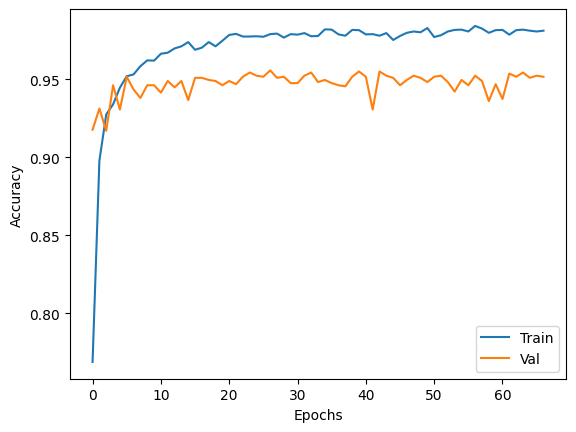

In [ ]:
history = clf.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

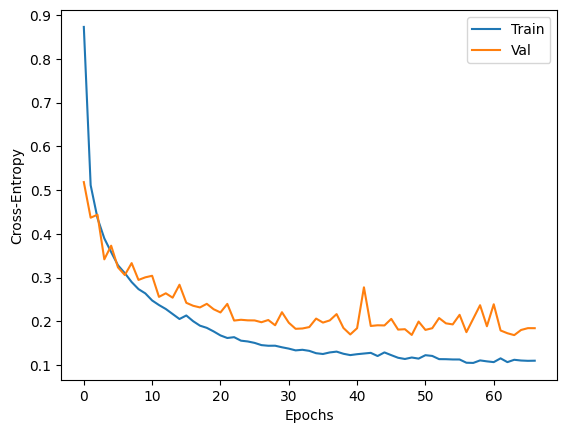

In [ ]:
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [ ]:
y_pred = clf.predict(X_test).astype(int)
y_scores = clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred, target_names = class_mapping))

93/93 [==============================] - 0s 920us/step
Accuracy 0.9284017645062775
F1-score 0.928688824045168
                    precision    recall  f1-score   support

           WALKING       0.95      0.98      0.97       496
  WALKING_UPSTAIRS       0.93      0.94      0.94       471
WALKING_DOWNSTAIRS       0.97      0.92      0.94       420
           SITTING       0.96      0.79      0.86       491
          STANDING       0.81      0.97      0.88       532
            LAYING       1.00      0.96      0.98       537

          accuracy                           0.93      2947
         macro avg       0.94      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947

